# Stack Overflow

## Introduction 

In the second part of this assignment, you will choose to create and analyze time series of creation dates of Stack Overflow questions, or Stack Overflow answers. You need to choose only one of the two, but please mention clearly what kind of time series you created. This assignment is to be completed **INDIVIDUALLY** and is due on **October 6 at 5pm**.

As stated above, you need to create time series of Stack Overflow questions, or answers using their creation dates. In order to do so you should use the information derived from Homework 1.1. Note that the focus of this homework is not on data collection, but on data analysis and interpretation so do not worry if you did not collect all data in the previous homework.

You are going to analyze users. If you selected to create time series of questions take the top 100 users with the most question posts, while if you created time series of answers take the top 100 users with the highest answer scores. For each user, your time series will be the number of questions (for questions), or the score value (for answers) posted by that user at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at a certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze users asking questions and sample during different hours of the day, your hypothesis could be that some users ask more questions during night hours because they are students, while others are more active during day time because they work in industry.   

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data (your hypothesis), what timeseries you created, what method you chose and why. Providing us with novel, or more than one hypotheses/analyses will give you extra credit. **(20 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

Summry 
- I am hoping to find some patterns in the users behavior monthly. More specifically, how the top 100 users contributed to Stack Overflow as time elapses in 2015. Therefore, in the "resampling" process, I restructured my data by month.

- I predict that during the final study period (May and December), we might see a surge in the number of quetions posted.

- I will try Euclidean Distance in the first analysis.


In [1]:
# File imports
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime 


In [2]:
# Create a data frame by loading a csv file
# I am interested in questions posted by top 100 users
df = pd.read_csv("data_frame.csv", sep = '\t', encoding = 'utf-8', )
df = df.drop("Unnamed: 0", 1) #Drop the first column automatically created by "csv method"
df = df[df.Type == "Q"]
df_question = df[df.OwnerUserId != -1]
df_question.head() #df is a dataframe of all questions

,Id,CreationDate,OwnerUserId,Tags,ViewCount,Score,Type
3,27727385.0,2015-01-01T00:00:58.253,3210431.0,php,184.0,0.0,Q
5,27727388.0,2015-01-01T00:01:43.673,868779.0,apache-pig,180.0,1.0,Q
8,27727391.0,2015-01-01T00:02:32.123,4372672.0,ios,127.0,1.0,Q
9,27727393.0,2015-01-01T00:02:57.983,2482149.0,sql-server,62.0,3.0,Q
10,27727394.0,2015-01-01T00:03:31.337,4263870.0,php,306.0,-3.0,Q


In [3]:
#Get top 100 users by the number of questions they posted during 2015
top100 = df_question['OwnerUserId'].value_counts().head(100)
top100_list = top100.index.tolist()
top100.head()

875317.0     476
2786156.0    363
1194415.0    361
651174.0     338
1833945.0    335
Name: OwnerUserId, dtype: int64

In [4]:
df_rank = pd.DataFrame({'OwnerUserId': top100.index, 'Number of Questions': top100.values})
df_rank.head()

,Number of Questions,OwnerUserId
0,476,875317.0
1,363,2786156.0
2,361,1194415.0
3,338,651174.0
4,335,1833945.0


In [6]:
# Get all the questions asked by top 100 users
df_entry = pd.merge(df_question, df_rank, how = "inner", on = ["OwnerUserId"]) #Get intersection on owneruserid
df_entry.CreationDate = pd.to_datetime(df_entry.CreationDate)
df_entry.head()

,Id,CreationDate,OwnerUserId,Tags,ViewCount,Score,Type,Number of Questions
0,27727406.0,2015-01-01 00:05:03.773,875317.0,c#,135.0,3.0,Q,476
1,27762933.0,2015-01-04 06:10:30.500,875317.0,windows-store-apps,36.0,0.0,Q,476
2,27789456.0,2015-01-05 23:06:01.837,875317.0,c#,300.0,0.0,Q,476
3,27803761.0,2015-01-06 17:16:33.923,875317.0,c#,71.0,0.0,Q,476
4,27804430.0,2015-01-06 18:00:58.740,875317.0,c#,41.0,-1.0,Q,476


In [9]:
# Input: a list of top 100 users, all the entries
# Output: Return a data frame of users' time series
def getTimeSeriesDataFrame(top100_users, df_all_entries):
    df_875317 = df_entry[df_entry['OwnerUserId'] == 875317.0] #User 875317 has the indices (all 12 months) I want
    series_875317 = df_875317.resample('M', on='CreationDate')['OwnerUserId'].count()
    df_Time_Series = pd.DataFrame(index = series_875317.index) #Set the index properly. Now it's empty
    
    for user in top100_users:
        df_tmp = df_all_entries[df_all_entries.OwnerUserId == user]
        series_tmp = df_tmp.resample('M', on = 'CreationDate')['OwnerUserId'].count()
        df_Time_Series[user] = series_tmp
    
    return df_Time_Series

#Store all time series in a dataframe
df_Time_Series_100 = getTimeSeriesDataFrame(top100_list, df_entry).fillna(0)
df_Time_Series_100

,875317.0,2786156.0,1194415.0,651174.0,1833945.0,1223975.0,4381665.0,4009451.0,2674303.0,784597.0,...,4499505.0,1137669.0,3102968.0,3736648.0,122536.0,3595549.0,1197249.0,264052.0,40106.0,4968722.0
CreationDate,,,,,,,,,,,,,,,,,,,,,
2015-01-31,37,44,42,40,24,22,12,30,26,34,...,6,1,7,26,20,0.0,1,15,12,0.0
2015-02-28,16,30,34,35,39,21,36,7,30,14,...,2,9,7,21,34,5.0,15,23,5,0.0
2015-03-31,37,7,46,40,25,21,31,19,15,20,...,3,38,2,16,32,8.0,39,9,27,0.0
2015-04-30,34,28,39,25,36,27,37,17,27,9,...,27,18,0,5,16,11.0,15,16,14,0.0
2015-05-31,22,48,23,38,24,31,25,21,19,15,...,42,30,49,20,11,5.0,15,9,14,0.0
2015-06-30,50,38,14,21,26,47,22,46,22,18,...,40,1,14,23,1,31.0,6,4,6,17.0
2015-07-31,49,31,20,35,20,37,32,29,22,17,...,18,0,15,16,1,19.0,12,10,17,30.0
2015-08-31,44,32,40,24,30,39,28,30,30,12,...,11,0,5,13,5,24.0,31,2,6,28.0
2015-09-30,49,25,39,25,24,17,36,47,28,15,...,5,28,24,9,2,26.0,6,10,13,16.0


In [10]:
# Convert df_Time_Series to an array for manipulation later 
list_time_series = []
for column in df_Time_Series_100:
    list_time_series.append(df_Time_Series_100[column].tolist())

X_array = np.array(list_time_series, dtype = int) #Store in a numpy array and set data type = integer
X_array

array([[37, 16, 37, ..., 50, 38, 50],
       [44, 30,  7, ..., 42, 28, 10],
       [42, 34, 46, ..., 33, 17, 14],
       ..., 
       [15, 23,  9, ...,  8, 26, 27],
       [12,  5, 27, ..., 13, 19, 13],
       [ 0,  0,  0, ..., 37, 22,  8]])

In [20]:
#Get pairwise distance array
import scipy
from scipy.spatial.distance import pdist, squareform

Y = pdist(X_array, 'euclidean')
X = squareform(Y) 

X

array([[   0.        ,   69.34695379,   68.81133628, ...,  105.68348972,
         100.54352291,   98.07140256],
       [  69.34695379,    0.        ,   58.83876273, ...,   82.03657721,
          79.82480817,   81.09870529],
       [  68.81133628,   58.83876273,    0.        , ...,   79.39773297,
          71.54019849,   89.13472948],
       ..., 
       [ 105.68348972,   82.03657721,   79.39773297, ...,    0.        ,
          32.15587038,   60.58877784],
       [ 100.54352291,   79.82480817,   71.54019849, ...,   32.15587038,
           0.        ,   51.79768335],
       [  98.07140256,   81.09870529,   89.13472948, ...,   60.58877784,
          51.79768335,    0.        ]])

In [21]:
# Get the most dissimilar two users in a tuple
coordinates_dis = np.unravel_index(X.argmax(), X.shape)
coordinates_dis

(11, 51)

In [22]:
# Get the most similar two users in a tuple
X_masked = np.ma.masked_equal(X, 0.0, copy=False)
coordinates_sim = np.unravel_index(X_masked.argmin(), X_masked.shape)
coordinates_sim

(63, 86)

In [23]:
# #Test how resample works; PLEASE IGNORE
# df_blah = df_entry[df_entry['OwnerUserId'] == 4968722.0]
# series = df_blah.resample('M', on='CreationDate')['OwnerUserId'].count()
# series


Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

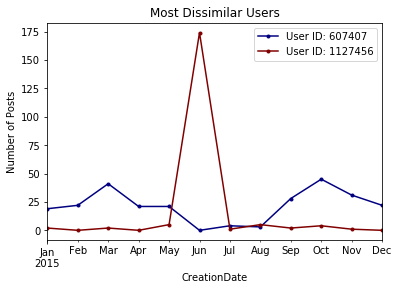

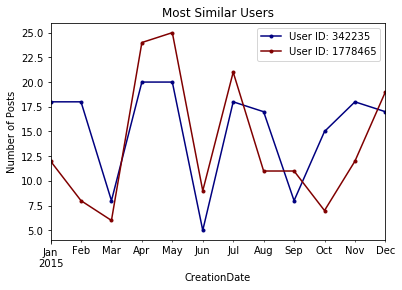

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline   

df_diss = df_Time_Series_100[[top100_list[coordinates_dis[0]], top100_list[coordinates_dis[1]]]]
plot_dis = df_diss.plot(title = 'Most Dissimilar Users', colormap='jet', marker='.')
plot_dis.set_ylabel("Number of Posts")
L = plot_dis.legend()
L.get_texts()[0].set_text('User ID: ' + str(int(top100_list[coordinates_dis[0]])))
L.get_texts()[1].set_text('User ID: ' + str(int(top100_list[coordinates_dis[1]])))

df_simm = df_Time_Series_100[[top100_list[coordinates_sim[0]], top100_list[coordinates_sim[1]]]]
plot_sim = df_simm.plot(title = 'Most Similar Users', colormap='jet', marker='.')
plot_sim.set_ylabel("Number of Posts")
L1 = plot_sim.legend()
L1.get_texts()[0].set_text('User ID: ' + str(int(top100_list[coordinates_sim[0]])))
L1.get_texts()[1].set_text('User ID: ' + str(int(top100_list[coordinates_sim[1]])))

What are your interpretation/conclusions from the above plotting comparisons? **(5 pts)**


- Although many more sophisticated measures exist, the Euclidean distance is by far the most frequently used distance measure. Therefore, I chose Euclidean distance as my dissimilarity function. 

- After constructing my dafa frame and numpy array, I calculated the Euclidean distances and store the pairwise values in a matrix. With the 4 targeted users identified, I plotted their time series separately in two plots.

- In the plots, the x axis is the month in 2015. Based on the total number of questions posted, we may predict that users may post more questions during May and December, since the users consist of many college engineering students.

- To sum, Euclidean distance is the sum of squared differences the time series, and it's indeed reflected in the two plots.

-----------------

Choose a different distance/similarity metric and repeat the same time series analysis. **(5 pts)**

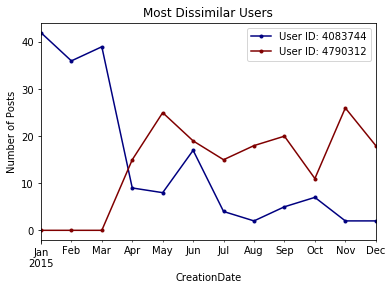

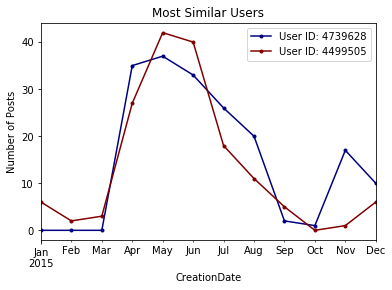

In [25]:
M = pdist(X_array, 'correlation')
N = squareform(M) 
coordinates_dis = np.unravel_index(N.argmax(), N.shape)
N_masked = np.ma.masked_equal(N, 0.0, copy=False)
coordinates_sim = np.unravel_index(N_masked.argmin(), N_masked.shape)

df_diss = df_Time_Series_100[[top100_list[coordinates_dis[0]], top100_list[coordinates_dis[1]]]]
plot_dis = df_diss.plot(title = 'Most Dissimilar Users', colormap='jet', marker='.')
plot_dis.set_ylabel("Number of Posts")
L = plot_dis.legend()
L.get_texts()[0].set_text('User ID: ' + str(int(top100_list[coordinates_dis[0]])))
L.get_texts()[1].set_text('User ID: ' + str(int(top100_list[coordinates_dis[1]])))

df_simm = df_Time_Series_100[[top100_list[coordinates_sim[0]], top100_list[coordinates_sim[1]]]]
plot_sim = df_simm.plot(title = 'Most Similar Users', colormap='jet', marker='.')
plot_sim.set_ylabel("Number of Posts")
L1 = plot_sim.legend()
L1.get_texts()[0].set_text('User ID: ' + str(int(top100_list[coordinates_sim[0]])))
L1.get_texts()[1].set_text('User ID: ' + str(int(top100_list[coordinates_sim[1]])))

Compare the two different metrics you used and report any observations. Why did you select the specific metrics? Which do you think performed better based on the results you were expecting and why? **(5 pts)**

- I chose "correlation" as the metric for the second analysis. As shown in the plots, we have different results (pair of users) compared to the first metric. 

- Compared to Euclidean distance, this approach yields users who have a totally different/similar trend of posting questions. If we are studying the behavior of two similar users, "correlation" metric is better in this context.
